In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import os
import sklearn
import scipy.stats as stats

In [42]:
data=pd.read_csv("cars.csv")

In [45]:
data.head()


,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [46]:
data.shape

(432, 15)

In [5]:
data.isnull()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
428,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
429,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
430,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

In [7]:
for col in data.columns:
    print(col)

Make
Model
Type
Origin
DriveTrain
MSRP
Invoice
EngineSize
Cylinders
Horsepower
MPG_City
MPG_Highway
Weight
Wheelbase
Length


In [8]:
data['Origin'].value_counts()

Asia      158
USA       147
Europe    123
Name: Origin, dtype: int64

In [9]:
data['Make'].value_counts()

Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Nissan           17
Honda            17
Chrysler         15
Volkswagen       15
Mitsubishi       13
Dodge            13
Hyundai          12
Volvo            12
Jaguar           12
Mazda            11
Subaru           11
Kia              11
Lexus            11
Pontiac          11
Buick             9
Mercury           9
Lincoln           9
Saturn            8
Cadillac          8
GMC               8
Suzuki            8
Infiniti          8
Saab              7
Acura             7
Porsche           7
Jeep              3
Oldsmobile        3
Land Rover        3
Scion             2
MINI              2
Isuzu             2
Hummer            1
Name: Make, dtype: int64

In [10]:
data['Make'].value_counts()[0:10]

Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Nissan           17
Honda            17
Chrysler         15
Volkswagen       15
Name: Make, dtype: int64

In [11]:
data['Make'].value_counts()[0:5]

Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Name: Make, dtype: int64

In [12]:
data['Make'].value_counts()[0:5].keys()

Index(['Toyota', 'Chevrolet', 'Mercedes-Benz', 'Ford', 'BMW'], dtype='object')

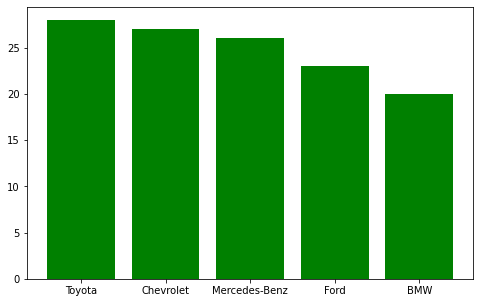

In [13]:
plt.figure(figsize=(8,5))
plt.bar(list(data['Make'].value_counts()[0:5].keys()),list(data['Make'].value_counts()[0:5]),color="g")
plt.show()

In [14]:
car_weight=data[['EngineSize','Weight']]

In [15]:
car_weight.head()

,EngineSize,Weight
0,3.5,4451.0
1,2.0,2778.0
2,2.4,3230.0
3,3.2,3575.0
4,3.5,3880.0


In [16]:
car_weight=car_weight.sort_values(by=['Weight'],ascending=False)

In [17]:
car_weight.head()

,EngineSize,Weight
120,6.8,7190.0
169,6.0,6400.0
145,6.0,6133.0
233,5.4,5969.0
64,6.0,5879.0


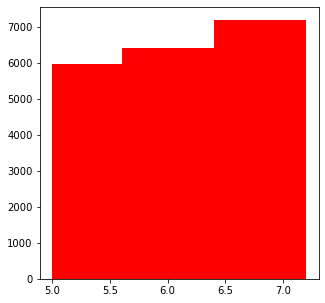

In [18]:
plt.figure(figsize=(5,5))
plt.bar(list(car_weight['EngineSize'])[0:5],list(car_weight['Weight'])[0:5],color='r')
plt.show()

In [19]:
data.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [20]:
data[data['Origin'].isin(['Asia','Europe'])]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


In [21]:
data['Weight']>4000

0       True
1      False
2      False
3      False
4      False
       ...  
427    False
428    False
429    False
430    False
431    False
Name: Weight, Length: 432, dtype: bool

In [22]:
data[(data['Weight']>4000)]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
15,Audi,A4 3.0 Quattro convertible 2dr,Sedan,Europe,All,"$44,240","$40,075",3.0,6.0,220.0,18.0,25.0,4013.0,105.0,180.0
17,Audi,A6 4.2 Quattro 4dr,Sedan,Europe,All,"$49,690","$44,936",4.2,8.0,300.0,17.0,24.0,4024.0,109.0,193.0
18,Audi,A8 L Quattro 4dr,Sedan,Europe,All,"$69,190","$64,740",4.2,8.0,330.0,17.0,24.0,4399.0,121.0,204.0
20,Audi,RS 6 4dr,Sports,Europe,Front,"$84,600","$76,417",4.2,8.0,450.0,15.0,22.0,4024.0,109.0,191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,Volkswagen,Touareg V6,SUV,Europe,All,"$35,515","$32,243",3.2,6.0,220.0,15.0,20.0,5086.0,112.0,187.0
415,Volkswagen,Phaeton 4dr,Sedan,Europe,Front,"$65,000","$59,912",4.2,8.0,335.0,16.0,22.0,5194.0,118.0,204.0
416,Volkswagen,Phaeton W12 4dr,Sedan,Europe,Front,"$75,000","$69,130",6.0,12.0,420.0,12.0,19.0,5399.0,118.0,204.0
419,Volkswagen,Passat W8,Wagon,Europe,Front,"$40,235","$36,956",4.0,8.0,270.0,18.0,25.0,4067.0,106.0,184.0


In [23]:
data[-(data['Weight']>4000)]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6.0,225.0,18.0,24.0,3893.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


In [24]:
#Linear Regression
data1=pd.read_csv('New.csv')

In [25]:
x = data1.x.to_numpy()
y = data1.y.to_numpy()

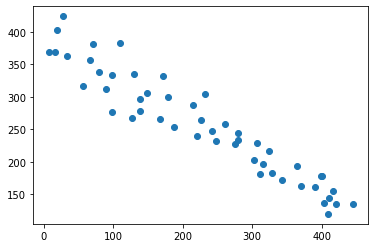

In [26]:
plt.scatter(x,y)

In [27]:
x = x/500.0
y = y/500.0

In [28]:
m,c = np.random.random(),np.random.random()

In [29]:
def learn(x,y,m,c,epoch):
  for i in range(epoch):  
    error = y - (m*x+c)
    x_error = (y - (m*x+c))*x
    error = np.sum(error)/len(x)
    x_error = np.sum(x_error)/len(x)
    learning_rate = 0.01  
    delta_m=learning_rate*x_error
    delta_c=learning_rate*error
    m += delta_m
    c += delta_c
  return(m,c)

In [30]:
m,c = learn(x,y,m,c,20000)

In [31]:
x1 = [0,1]
y1 = [0*m+c,1*m+c]

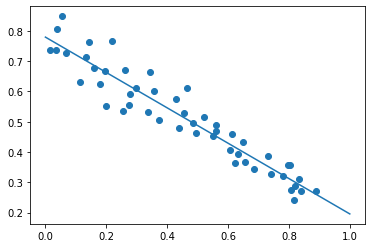

In [32]:
plt.scatter(x,y)
plt.plot(x1,y1)

<AxesSubplot:xlabel='Origin', ylabel='count'>

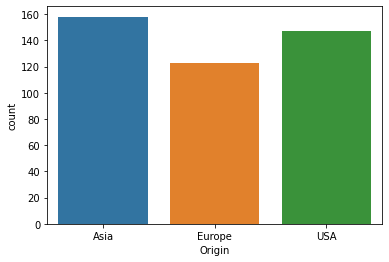

In [33]:
#LOGISTIC REGRESSION

sns.countplot(x="Origin",data=data)

<AxesSubplot:xlabel='Type', ylabel='count'>

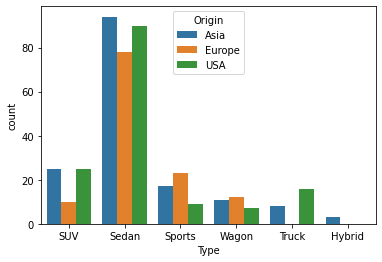

In [34]:
sns.countplot(x="Type",hue="Origin",data=data)

<AxesSubplot:ylabel='Frequency'>

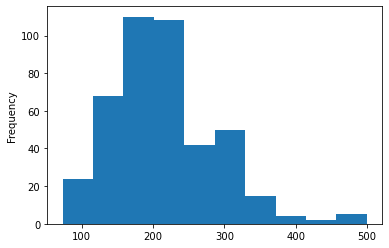

In [35]:
data["Horsepower"].plot.hist()

<AxesSubplot:xlabel='Type', ylabel='count'>

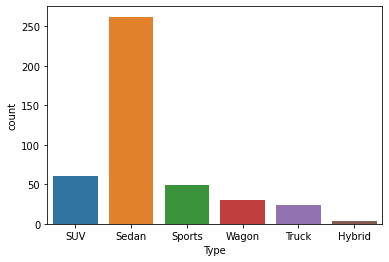

In [36]:
sns.countplot(x="Type",data=data)

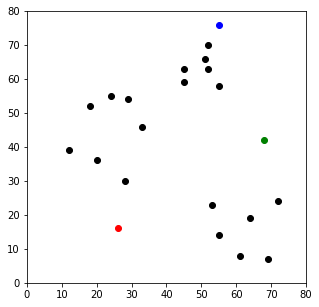

In [37]:
#K-mean Clustering
df=pd.DataFrame({
    'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y':[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})
np.random.seed(200)
k = 3
centroids = {
    i+1: [np.random.randint(0,80), np.random.randint(0,80)]
    for i in range(k)
}

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color='k')
colmap = {1: 'r', 2:'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

    x   y  distance_from_1  distance_from_2  distance_from_3  closet color
0  12  39            322.0            168.0           1591.0       2     g
1  20  36            120.0            288.0           1400.0       1     r
2  28  30             28.0            480.0           1242.0       1     r
3  18  52            288.0            500.0            888.0       1     r
4  29  54            114.0            468.0            572.0       1     r


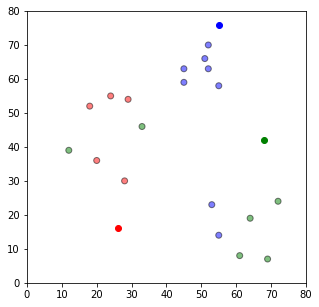

In [38]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
            (df['x'] - centroids[i][0]) ** 2
            * (df['y'] - centroids[i][1])**  2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closet'] = df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closet'] = df['closet'].map(lambda x: int(x.lstrip('distance_from')))
    df['color'] = df['closet'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig =plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

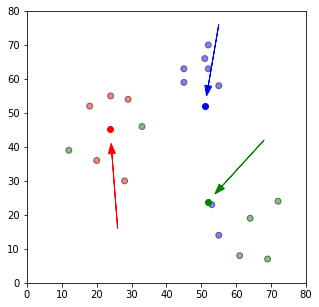

In [39]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closet'] ==i]['x'])
        centroids[i][1] = np.mean(df[df['closet'] ==i]['y'])
    return k

centroids = update(centroids)

fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'], df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0])*0.75
    dy = (centroids[i][1] - old_centroids[i][1])*0.75
    ax.arrow(old_x,old_y,dx,dy,head_width=2,head_length=3,fc=colmap[i],ec=colmap[i])
plt.show()    


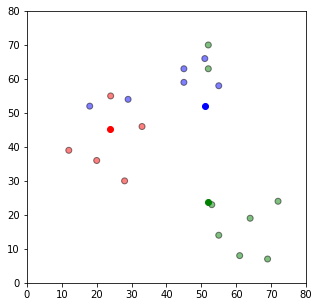

In [40]:
#Repeat assignment stage

df = assignment(df,centroids) 

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()